# Non-technical evaluation plots

Produces plots for non-technical evaluation of the model at a given step. The result is a series of line plots showing forecasts, actuals, and a dashed line between the two along with the percent and absolute difference between them. Loops through multiple steps. 

In [1]:
import requests
import pandas as pd
import json
import os
from pathlib import Path

#import matplotlib.pyplot as plt

# External
import geopandas as gpd
import sqlalchemy as sa

# VIEWS
from viewser.operations import fetch
from views_mapper2.mapper2 import *
from views_mapper2.BBoxWriter import *
from views_mapper2.dictionary_writer import *
from ingester3.config import source_db_path
from views_forecasts.extensions import *


## Fetch forecasts from internal storage

In [5]:
for EndOfHistory in range(519, 538 + 1):

    #which model do you want to be graphed within this notebook (accepts one model only)
    model_wanted = 'genetic_ensemble'
    model_wanted_pgm = 'ensemble_cm_calib'

    #current month run description
    dev_id = 'fatalities002'
    run_id = dev_id
    model_attempt = 't01'

    predstore_future = 'cm_' + model_wanted + '_f' + str(EndOfHistory)

    predictions_df = pd.DataFrame.forecasts.read_store(predstore_future, run=dev_id)
    predictions_df = predictions_df.reset_index()
    predictions_df['step'] = predictions_df['month_id'] - EndOfHistory

    # Rename column
    predictions_df.rename(columns={'step_combined': 'main_mean_ln'}, inplace=True)

    # Apply inverse natural log
    predictions_df['main_mean'] = np.expm1(predictions_df['main_mean_ln'])

    # Filter for country_id 124
    predictions_df = predictions_df[predictions_df['country_id'] == 124]

    # Reset index after filtering
    predictions_df = predictions_df.set_index(['step', 'month_id'], drop=True)

    # Dynamically rename the DataFrame based on EndOfHistory
    globals()[f'predictions_df_{EndOfHistory}'] = predictions_df


pr_46_cm_genetic_ensemble_f519.parquet
pr_46_cm_genetic_ensemble_f520.parquet
pr_46_cm_genetic_ensemble_f521.parquet
pr_46_cm_genetic_ensemble_f522.parquet
pr_46_cm_genetic_ensemble_f523.parquet
pr_46_cm_genetic_ensemble_f524.parquet
pr_46_cm_genetic_ensemble_f525.parquet
pr_46_cm_genetic_ensemble_f526.parquet
pr_46_cm_genetic_ensemble_f527.parquet
pr_46_cm_genetic_ensemble_f528.parquet
pr_46_cm_genetic_ensemble_f529.parquet
pr_46_cm_genetic_ensemble_f530.parquet
pr_46_cm_genetic_ensemble_f531.parquet
pr_46_cm_genetic_ensemble_f532.parquet
pr_46_cm_genetic_ensemble_f533.parquet
pr_46_cm_genetic_ensemble_f534.parquet
pr_46_cm_genetic_ensemble_f535.parquet
pr_46_cm_genetic_ensemble_f536.parquet
pr_46_cm_genetic_ensemble_f537.parquet
pr_46_cm_genetic_ensemble_f538.parquet


In [6]:
predictions_df_519

,feature,country_id,main_mean_ln,main_mean
step,month_id,,,
1,520,124,4.939528,138.704326
2,521,124,5.377005,215.373222
3,522,124,5.611314,272.503288
4,523,124,5.784540,324.232478
5,524,124,5.856406,348.465764
6,525,124,5.719933,303.884394
7,526,124,5.748061,312.582015
8,527,124,5.762335,317.090219
9,528,124,6.059048,426.967670


In [7]:
predictions_df_538

,feature,country_id,main_mean_ln,main_mean
step,month_id,,,
1,539,124,2.277075,8.748126
2,540,124,2.417114,10.213449
3,541,124,2.771600,14.984196
4,542,124,2.769175,14.945466
5,543,124,3.042042,19.947979
6,544,124,2.955460,18.210566
7,545,124,3.022438,19.541309
8,546,124,2.827206,15.898176
9,547,124,3.005873,19.203845


## Fetch UCDP data from the API

In [8]:
PAGE_SIZE = 1000

# Construct the API URL
VIEWS_URL = f'https://api.viewsforecasting.org/predictors_fatalities002_0000_00/cm/px/ucdp_ged_sb_best_sum?iso=YEM&page_size={PAGE_SIZE}'
master_list = []

# Initial API request
r = requests.get(VIEWS_URL)
page_data = r.json()

# Append the data from the first page
master_list += page_data['data']

# Handle pagination
while page_data.get('next_page'):
    r = requests.get(page_data['next_page'])
    page_data = r.json()
    master_list += page_data['data']

# Convert the collected data to a DataFrame
ged_raw = pd.DataFrame(master_list)

# Create a 'Date' column by combining 'year' and 'month'
ged_raw['Date'] = ged_raw['year'].astype(str) + '-' + ged_raw['month'].astype(str)

UCDP = ged_raw.sort_values('month_id')  # Ensure ascending order



In [9]:
UCDP

,country_id,month_id,name,gwcode,isoab,year,month,ucdp_ged_sb_best_sum,Date
0,196,121,Yemen Arab Republic,678,YEM,1990,1,0.0,1990-1
1,196,122,Yemen Arab Republic,678,YEM,1990,2,0.0,1990-2
2,196,123,Yemen Arab Republic,678,YEM,1990,3,0.0,1990-3
3,196,124,Yemen Arab Republic,678,YEM,1990,4,0.0,1990-4
4,196,125,Yemen Arab Republic,678,YEM,1990,5,0.0,1990-5
...,...,...,...,...,...,...,...,...,...
415,124,534,Yemen,678,YEM,2024,6,20.0,2024-6
416,124,535,Yemen,678,YEM,2024,7,13.0,2024-7
417,124,536,Yemen,678,YEM,2024,8,7.0,2024-8
418,124,537,Yemen,678,YEM,2024,9,28.0,2024-9


## Plot the data

In [10]:
# Define the range of month_ids you want to include on the plot
start_month_id = 519  # 2021-01
end_month_id = 538  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

In [12]:

# Filter the UCDP DataFrame to only include rows with month_id in month_ids_to_plot
UCDP_filtered = UCDP[UCDP['month_id'].isin(month_ids_to_plot)]
UCDP_filtered

,country_id,month_id,name,gwcode,isoab,year,month,ucdp_ged_sb_best_sum,Date
400,124,519,Yemen,678,YEM,2023,3,151.0,2023-3
401,124,520,Yemen,678,YEM,2023,4,33.0,2023-4
402,124,521,Yemen,678,YEM,2023,5,42.0,2023-5
403,124,522,Yemen,678,YEM,2023,6,15.0,2023-6
404,124,523,Yemen,678,YEM,2023,7,43.0,2023-7
405,124,524,Yemen,678,YEM,2023,8,84.0,2023-8
406,124,525,Yemen,678,YEM,2023,9,20.0,2023-9
407,124,526,Yemen,678,YEM,2023,10,199.0,2023-10
408,124,527,Yemen,678,YEM,2023,11,36.0,2023-11
409,124,528,Yemen,678,YEM,2023,12,11.0,2023-12


In [58]:
steps = [1, 3, 6, 12, 24, 36]

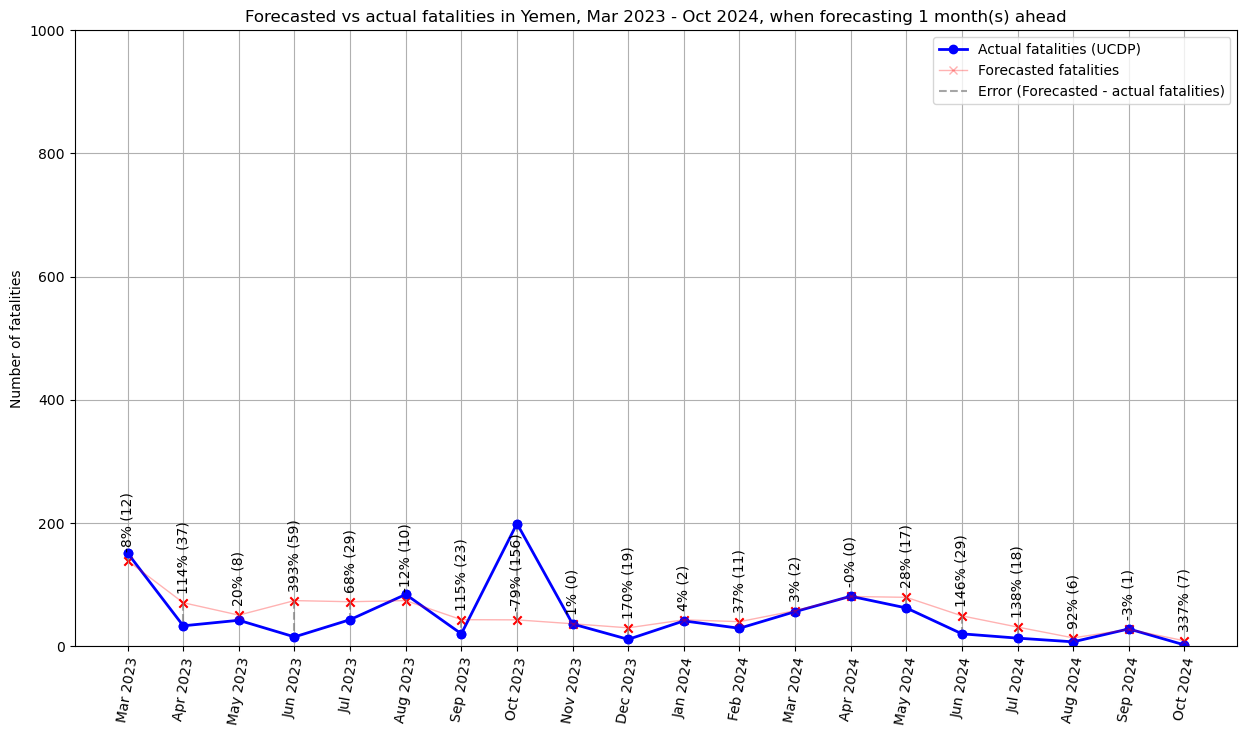

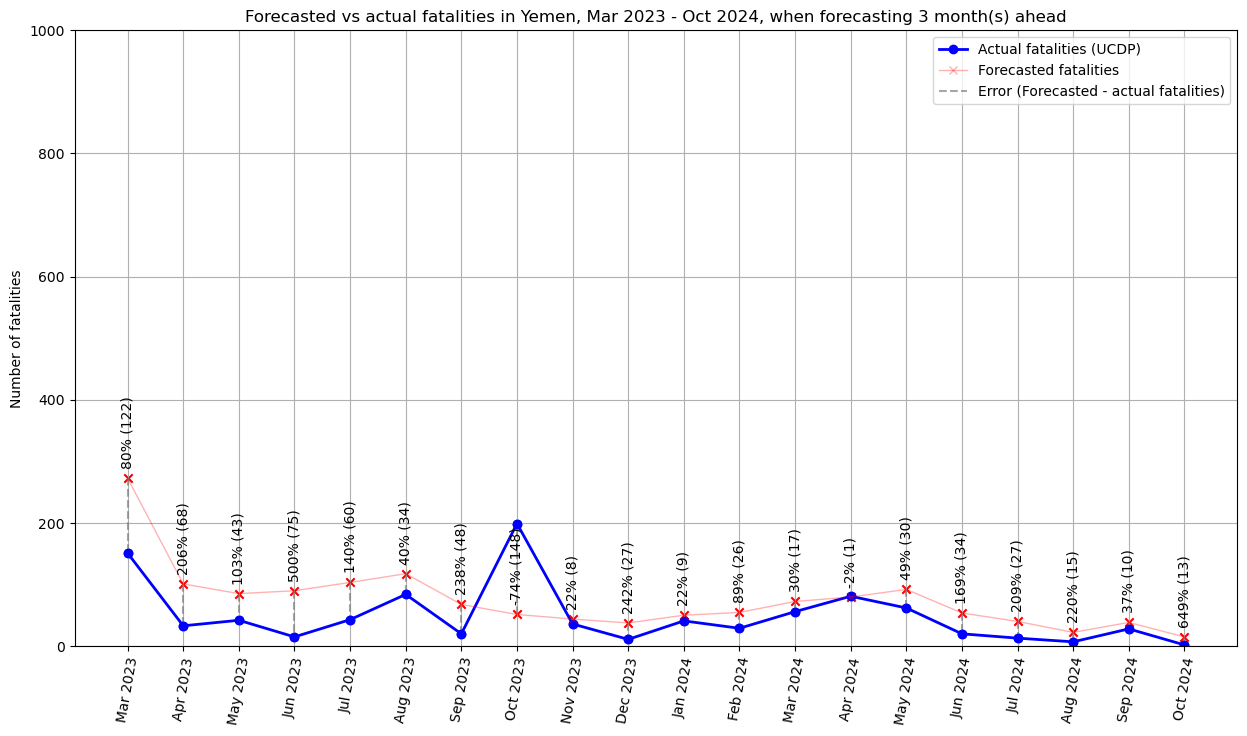

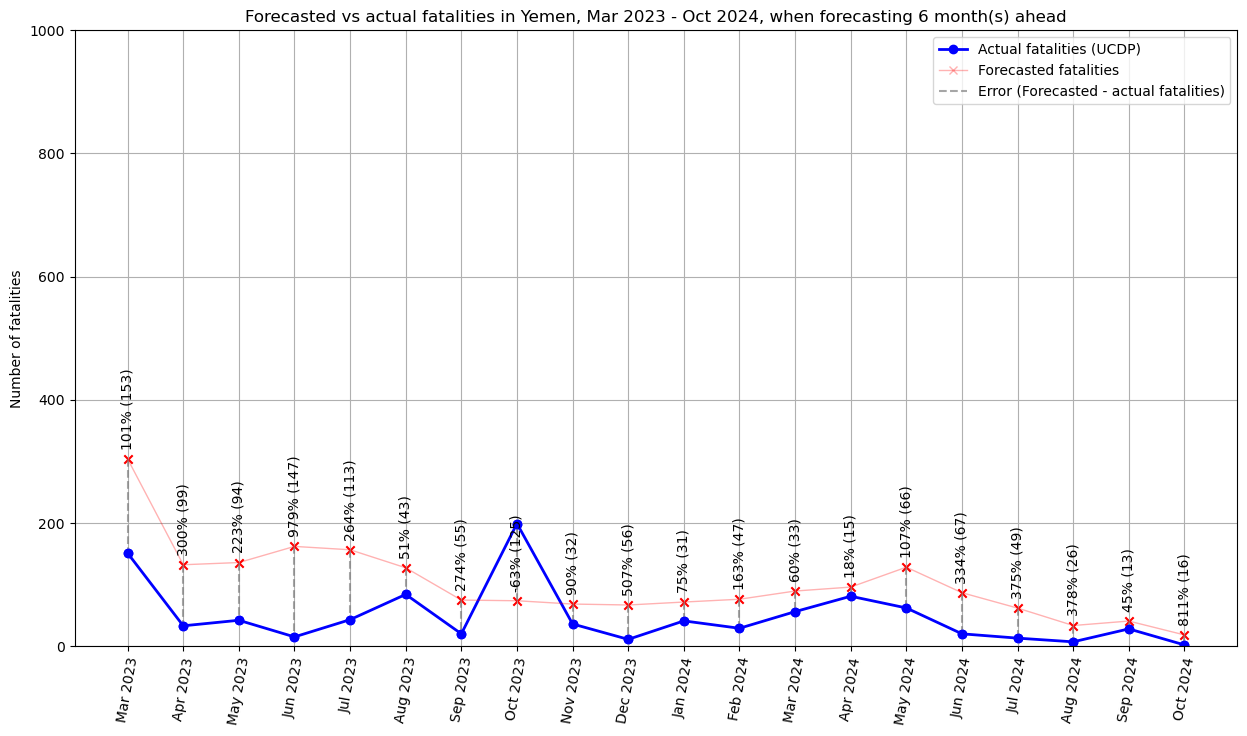

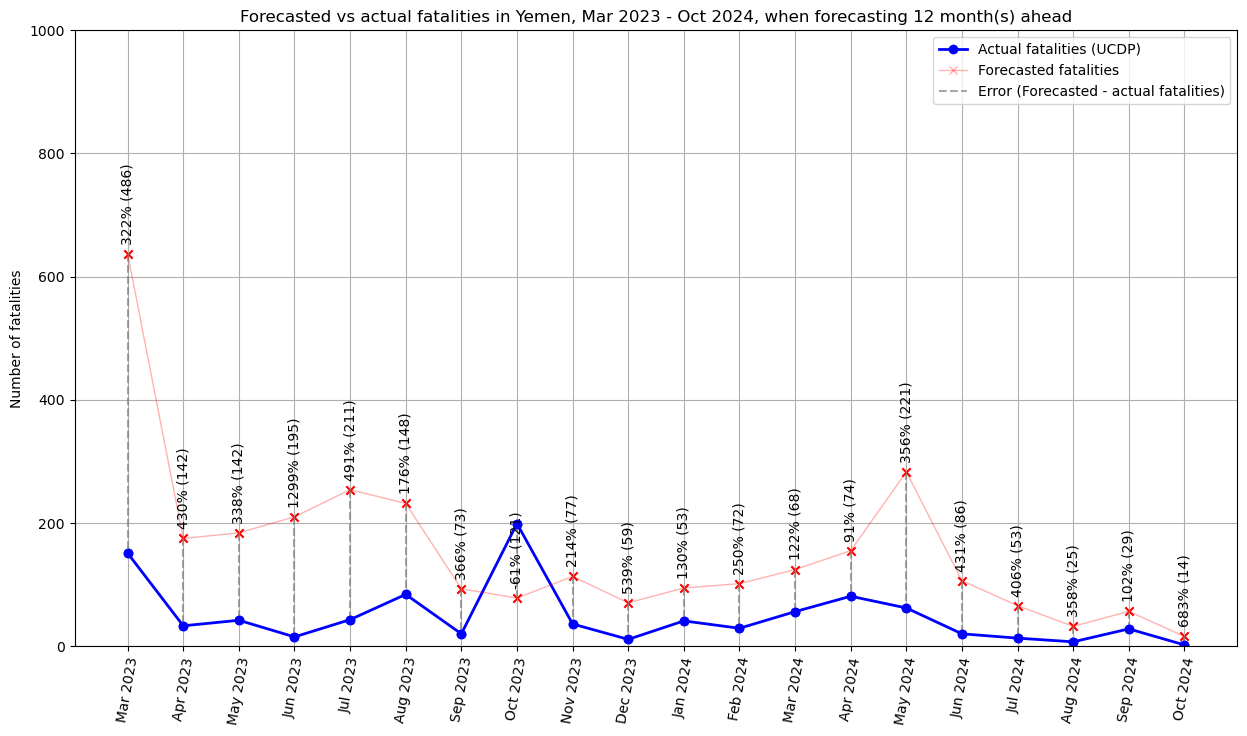

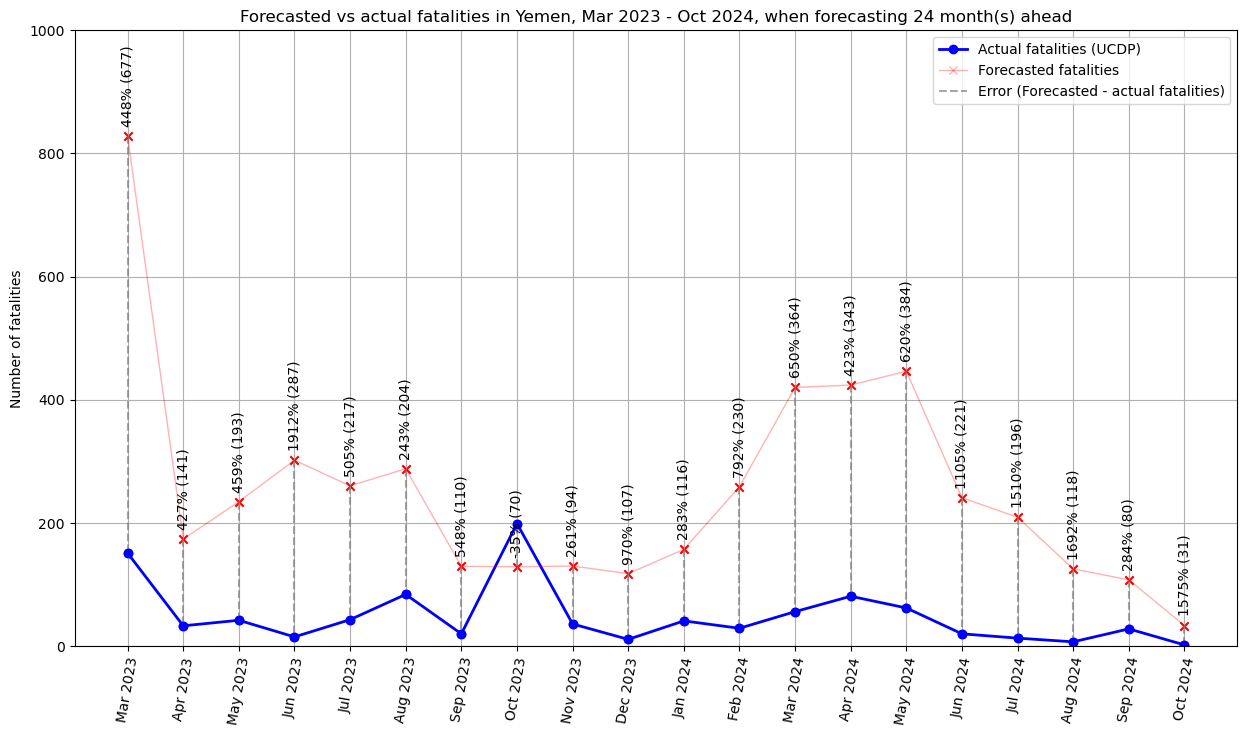

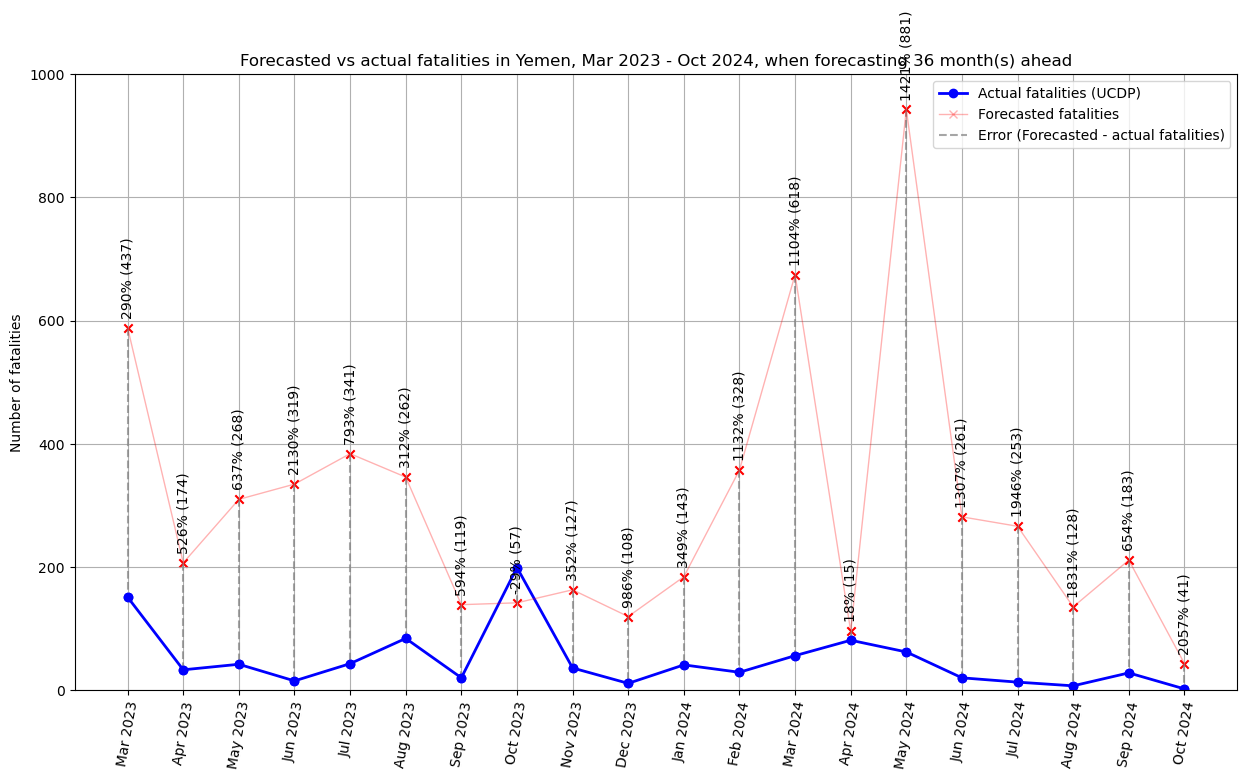

In [68]:
for step in steps:

    # Define the range of month_ids you want to include
    month_ids_to_plot = range(519, 539)  # Example range, adjust as needed

    # Define ticks for months
    month_labels = ['Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023',
                    'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024', 'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024']

    month_ids_ticks = range(start_month_id, end_month_id + 1)


    # Initialize plot
    plt.figure(figsize=(15, 8))

    # Lists to store the actual and forecasted values for later plotting of the line
    actual_values = []
    forecasted_values = []
    month_ids_for_lines = []

    # Adding the legend entry for forecasted values
    #forecasted_legend = plt.scatter([], [], marker='x', color='red', label='Forecasted fatalities')

    # Loop through the month_ids_to_plot to generate the plots for each month
    for month_id in month_ids_to_plot:
        # Access the corresponding predictions_df using globals
        predictions_df_name = f'predictions_df_{month_id}'  # Dynamic name based on month_id
        
        if predictions_df_name in globals():
            # Get the predictions_df from globals
            predictions_df = globals()[predictions_df_name]

            # Filter the rows where 'step' == 3 (as 'step' is part of the index)
            step_3_rows = predictions_df.loc[predictions_df.index.get_level_values('step') == step]

            # Check if step_3_rows contains data
            if not step_3_rows.empty:
                # Retrieve the forecasted value from 'main_mean' for 'step' == 3
                forecasted_value = step_3_rows['main_mean'].iloc[0]  # Assuming you want the first match

                # Get the actual value from UCDP DataFrame for the same month_id
                if month_id in UCDP['month_id'].values:
                    actual_value = UCDP.loc[UCDP['month_id'] == month_id, 'ucdp_ged_sb_best_sum'].iloc[0]
                else:
                    actual_value = None  # Handle if no corresponding actual value exists

                # If actual value exists, plot forecasted and actual values and add a dashed line
                if actual_value is not None:
                    # Plot the forecasted value (red 'x' marker)
                    plt.scatter(month_id, forecasted_value, marker='x', color='red', label='_nolegend_')

                    # Plot the actual value (blue 'o' marker)
                    plt.scatter(month_id, actual_value, marker='o', color='blue', label='_nolegend_')

                    # Connect the forecasted and actual values with a dashed line
                    plt.plot([month_id, month_id], [forecasted_value, actual_value], linestyle='--', color='gray', alpha=0.7)

                    # Calculate percent change and absolute difference
                    percent_change = ((forecasted_value - actual_value) / actual_value) * 100 if actual_value != 0 else 0
                    absolute_difference = abs(forecasted_value - actual_value)

                    # Add the percent change text above the red "x"
                    text_x_offset = 0  # Adjust to your liking
                    text_y_offset = 15  # Adjust to your liking to place the text above the red "x"
                    plt.text(
                        month_id + text_x_offset,  # Adjust horizontal placement if needed
                        forecasted_value + text_y_offset,  # Place text above the red "x"
                        f'{percent_change:.0f}% ({absolute_difference:.0f})',
                        rotation=90,  # Text should be horizontal
                        color='black',
                        ha='center',
                        va='bottom'  # Align the text at the bottom (so it appears above the marker)
                    )

                    # Add to the lists for the actual values line
                    actual_values.append(actual_value)
                    forecasted_values.append(forecasted_value)
                    month_ids_for_lines.append(month_id)

    # Plot a line connecting the actual values
    plt.plot(month_ids_for_lines, actual_values, label='Actual fatalities (UCDP)', marker='o', color='blue', linestyle='-', linewidth=2)

    plt.plot(month_ids_for_lines, forecasted_values, label='Forecasted fatalities', marker='x',linestyle='-', color='red', alpha=0.3, linewidth=1)

    # Adding the legend entry for the dashed line (Difference)
    difference_legend = plt.plot([], [], linestyle='--', color='gray', alpha=0.7, label='Error (Forecasted - actual fatalities)')

    # Customize the plot with labels and title
    #plt.xlabel('Month ID')
    plt.xticks(month_ids_ticks, month_labels, rotation=80)
    plt.ylabel('Number of fatalities')
    plt.title(f'Forecasted vs actual fatalities in Yemen, Mar 2023 - Oct 2024, when forecasting {step} month(s) ahead')

    # Add the legend to include forecasted fatalities, actual fatalities, and difference
    plt.legend(loc='upper right')

    # Add a grid to the plot
    plt.grid(True)

    # Set the y-axis limits
    plt.ylim(0, 1000)

    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/Yemen_eval_forecast_vs_actual_step{step}.png', dpi=300)

    # Show the plot
    plt.show()
    
